       L    O    G    m    a    k    e    r
pos                                        
0    0.8  0.0  0.0 -0.5  0.0  0.0  0.0  0.0
1    0.0  0.6  0.0  0.0 -0.5  0.0  0.0  0.0
2    0.0  0.0  0.6  0.0  0.0 -0.5  0.0  0.0
3    0.0  0.6  0.0  0.0  0.0  0.0 -0.5  0.0
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.5


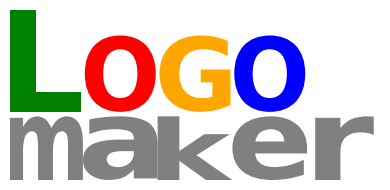

In [6]:
import logomaker
import matplotlib.pyplot as plt


# make Figure and Axes objects
fig, ax = plt.subplots(1,1,figsize=[4,2])

# load logo matrix
logo_df = logomaker.get_example_matrix('logomaker_logo_matrix',
                                       print_description=False)

print(logo_df)

# create color scheme
color_scheme = {
    'L' : [0, .5, 0],
    'O' : [1, 0, 0],
    'G' : [1, .65, 0],
    'maker': 'gray'
}

# create Logo object
logo_logo = logomaker.Logo(logo_df,
                           ax=ax,
                           color_scheme=color_scheme,
                           baseline_width=0,
                           show_spines=False,
                           vsep=.005,
                           width=.95)

# color the 'O' at the end of the logo a different color
logo_logo.style_single_glyph(c='O', p=3, color=[0, 0, 1])

# change the font of 'maker' and flip characters upright.
logo_logo.style_glyphs_below(flip=False, width=1.0)

# remove tick marks
ax.set_xticks([])
ax.set_yticks([])

# tighten layout
logo_logo.fig.tight_layout()

In [18]:
import torch
rand = torch.randn(26,256)

In [22]:
array = torch.nn.functional.softmax(rand, dim=1)
print(array)

tensor([[0.0075, 0.0023, 0.0036,  ..., 0.0021, 0.0016, 0.0029],
        [0.0058, 0.0011, 0.0022,  ..., 0.0021, 0.0012, 0.0033],
        [0.0041, 0.0051, 0.0026,  ..., 0.0032, 0.0148, 0.0025],
        ...,
        [0.0064, 0.0118, 0.0013,  ..., 0.0058, 0.0015, 0.0002],
        [0.0030, 0.0069, 0.0005,  ..., 0.0194, 0.0048, 0.0058],
        [0.0086, 0.0026, 0.0015,  ..., 0.0036, 0.0013, 0.0016]])


          -         [         ]         X         A         C         D  \
0  0.007486  0.005827  0.004115  0.001401  0.003742  0.002965  0.001308   
1  0.002337  0.001091  0.005063  0.000791  0.001750  0.002756  0.002525   
2  0.003638  0.002179  0.002618  0.002705  0.000399  0.002340  0.005134   
3  0.001392  0.001109  0.002246  0.002298  0.000644  0.000625  0.002674   
4  0.000400  0.007791  0.001552  0.004834  0.006452  0.001590  0.002629   
5  0.002813  0.001898  0.002155  0.000666  0.002759  0.033578  0.003739   
6  0.001512  0.001537  0.007459  0.004789  0.003371  0.004505  0.001816   
7  0.004994  0.001831  0.006006  0.007245  0.003181  0.000270  0.003667   
8  0.002973  0.001921  0.003474  0.001922  0.000830  0.000627  0.002771   
9  0.009112  0.000548  0.004066  0.021689  0.055631  0.010221  0.007877   

          E         F         G  ...         O         P         Q         R  \
0  0.001671  0.004198  0.001373  ...  0.007823  0.007796  0.000254  0.001722   
1  0.001455  0

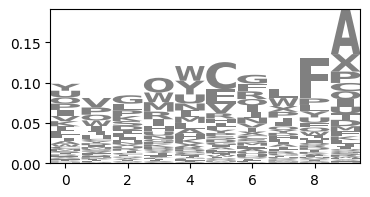

In [27]:
import pandas as pd

aminoacids = "-[]XACDEFGHIKLMNOPQRSTUVWY"
amino_acids = list(aminoacids)

df = pd.DataFrame(array.T[0:10], columns=amino_acids, dtype=float)
print(df)
fig, ax = plt.subplots(1,1,figsize=[4,2])
logo = logomaker.Logo(df, ax=ax)

In [ ]:
import pandas as pd

aminoacids = "-[]XACDEFGHIKLMNOPQRSTUVWY"
amino_acids = list(aminoacids)

num_positions = array.shape[1]
num_lines = (num_positions + 50 - 1) // 50

fig, axes = plt.subplots(num_lines, 1, figsize=(100, 5 * num_lines), squeeze=False)
print(f"num_positions: {num_positions}, num_lines: {num_lines}")
for line in range(num_lines):
    try:
        start = line * 50
        end = min(start + 50, num_positions)
        df = pd.DataFrame(array.T[start:end], columns=amino_acids)
        print("df", df.shape)
        print("starting logomaker")
        logo = logomaker.Logo(df, ax=axes[line, 0])
        print("finished logomaker")
        logo.style_spines(visible=False)
        logo.style_spines(spines=['left', 'bottom'], visible=True)
        logo.ax.set_ylabel("Probability")
        logo.ax.set_xlabel("Position")
        logo.ax.set_ylim(-1, 3)
    except Exception as e:
        print(f"Error: {e}")